In [8]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv(r'C:\Users\HP\Downloads\train.csv')

In [7]:
df

,player_id,name,age,gender,country,height,weight,ball_controlling_skills,body_reflexes,body_balance,...,strong_foot,behaviour_rating,matches_played,fitness_rating,trophies_won,dedication_level,coaching,years_of_experience,no_of_disqualifications,selection
0,PLID_4964,Keva Horan,23,M,Ukraine,6'2,176lbs,77.0,58.0,47.0,...,Right,7.7,NaN,8.1,2.0,High,Talent Hunt,8.0,0.0,1
1,PLID_11234,Herma Tann,18,M,Russia,5'10,148lbs,54.0,69.0,70.0,...,Any,5.3,0.0,NaN,3.0,Medium,Source,3.0,0.0,0
2,PLID_19127,Eilene Kizer,16,F,Spain,6'2,172lbs,34.0,43.0,45.0,...,Left,4.7,0.0,6.6,5.0,Low,Academy,2.0,0.0,1
3,PLID_17467,Andrea Badgett,27,M,Chile,5'11,165lbs,79.0,73.0,76.0,...,Right,8.6,113.0,8.6,6.0,Medium,Academy,13.0,16.0,1
4,PLID_9661,Jeremiah Bumbalough,19,F,Argentina,5'8,158lbs,47.0,61.0,74.0,...,Right,NaN,0.0,5.7,5.0,Medium,Academy,4.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13989,PLID_10956,Viva Stepney,20,M,Uruguay,6'0,161lbs,60.0,48.0,62.0,...,Right,6.0,NaN,7.6,2.0,Medium,Academy,6.0,0.0,1
13990,PLID_17290,Illa Pitre,18,F,England,5'10,165lbs,53.0,68.0,59.0,...,Right,5.3,0.0,5.6,3.0,Medium,Academy,4.0,0.0,0
13991,PLID_5193,Marylouise Mosley,17,M,Japan,6'0,172lbs,56.0,73.0,62.0,...,Left,5.7,0.0,7.7,3.0,Low,Talent Hunt,2.0,0.0,1
13992,PLID_12173,Teri Escamilla,20,F,Ukraine,5'10,150lbs,71.0,69.0,70.0,...,Left,6.8,1.0,5.8,4.0,Medium,Academy,6.0,0.0,1


In [11]:
plt.figure(figsize=(10,6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

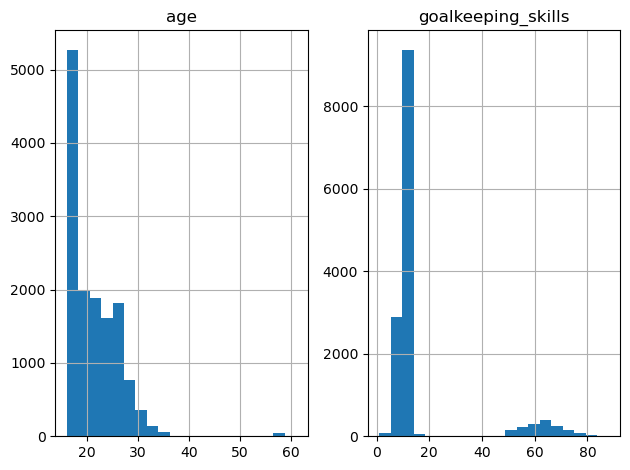

In [16]:
plt.figure(figsize=(10,6))
df[['age','height','weight','goalkeeping_skills']].hist(bins=20)
plt.tight_layout()
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_856\582798189.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


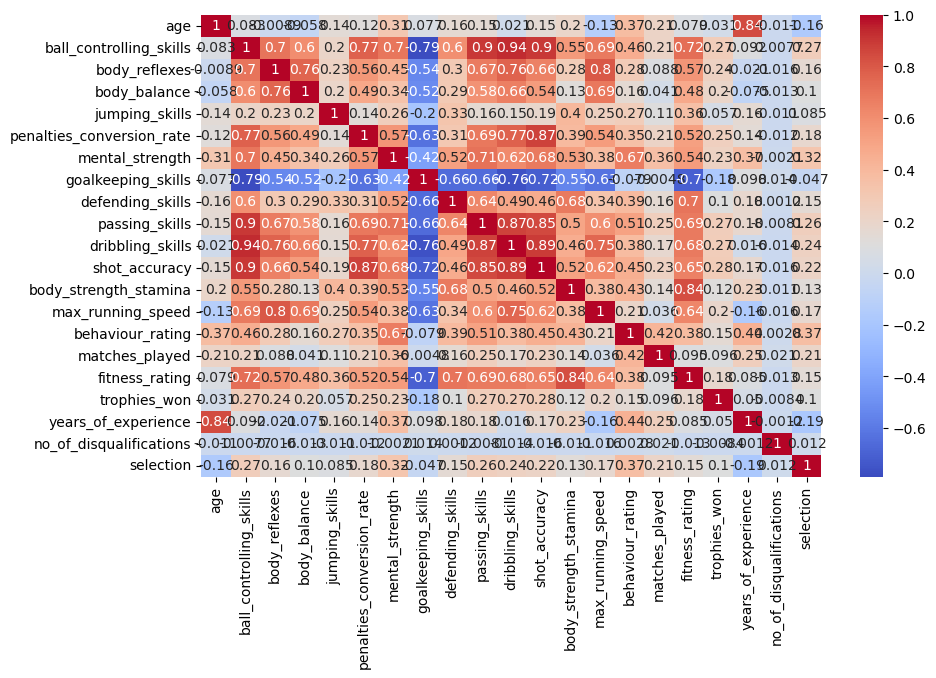

In [19]:
plt.figure(figsize=(10,6))
corr_matrix = df.corr()
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')
plt.show()

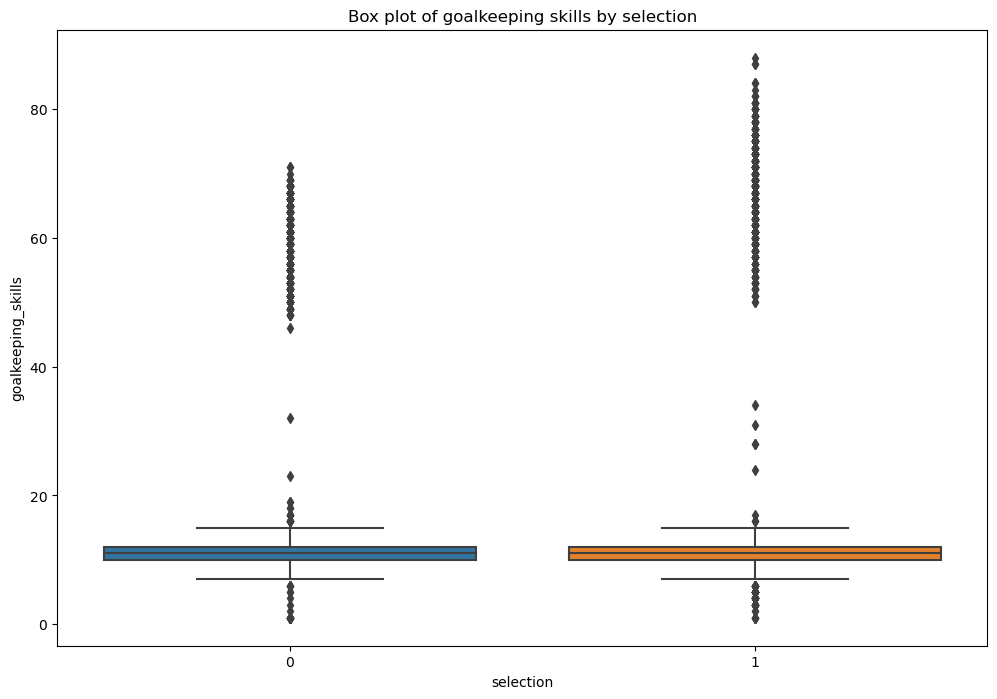

In [21]:
plt.figure(figsize=(12,8))
sns.boxplot(x='selection',y='goalkeeping_skills',data=df)
plt.title('Box plot of goalkeeping skills by selection')
plt.show()

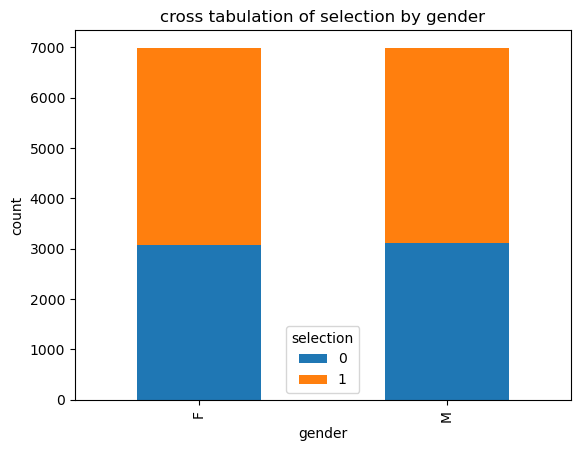

In [23]:
cross_tab = pd.crosstab(df['gender'],df['selection'])
cross_tab.plot(kind='bar',stacked=True)
plt.title('cross tabulation of selection by gender')
plt.xlabel('gender')
plt.ylabel('count')
plt.show()

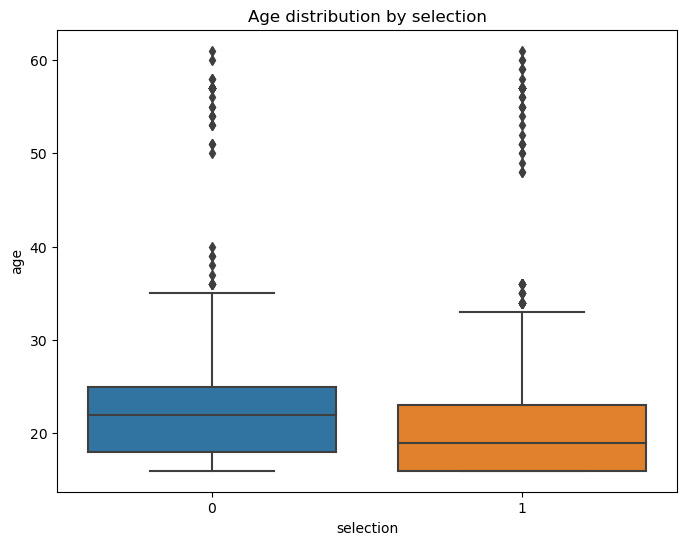

In [26]:
plt.figure(figsize=(8,6))
sns.boxplot(x='selection',y='age',data=df)
plt.title('Age distribution by selection')
plt.xlabel('selection')
plt.ylabel('age')
plt.show()

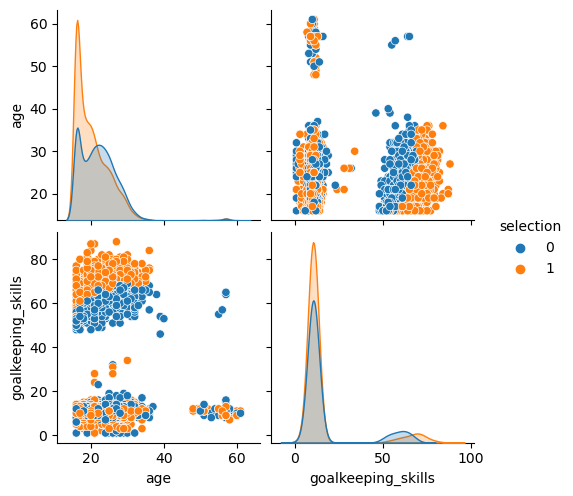

In [27]:
sns.pairplot(df[['age','height','weight','goalkeeping_skills','selection']],hue='selection')
plt.show()

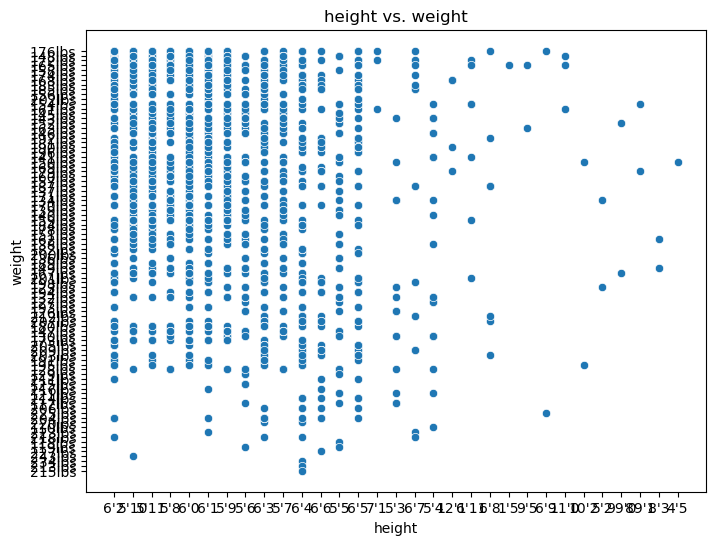

In [28]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='height',y='weight',data=df)
plt.title('height vs. weight')
plt.xlabel('height')
plt.ylabel('weight')
plt.show()

### preprocessing

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import re

In [45]:
df = df.dropna()

In [46]:
categorical_cols = ['gender', 'country']
numeric_cols = ['age', 'height', 'weight', 'goalkeeping_skills']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

In [48]:
X = preprocessor.fit_transform(df.drop('selection', axis=1))
y = df['selection']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


ValueError: could not convert string to float: "5'11"

### MODELING

In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [50]:

# Load the data and preprocess it (assuming you've already done the preprocessing)
# X_preprocessed and y are your preprocessed feature matrix and target variable

# Split the data into training and testing sets


In [53]:
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

NameError: name 'X_preprocessed' is not defined